#   **Theorictical**

In [3]:
import warnings
warnings.filterwarnings("ignore")

#### 1. ***Can we use Bagging for regression problems?***
*Answer-*

Yes, **Bagging (Bootstrap Aggregating)** can definitely be used for **regression problems**, not just for classification tasks. In fact, **Bagging** is widely applied in regression tasks to **reduce variance**, improve model stability, and **enhance prediction accuracy**. 

---

#### ✅ **What is Bagging in Machine Learning?**
**Bagging (Bootstrap Aggregating)** is an **ensemble learning technique** that combines the predictions of multiple base models (weak learners) to produce a **more accurate and stable prediction**. 

The core idea is:  
- **Randomly sample subsets of data (with replacement)** from the original dataset.
- **Train a base model (weak learner)** on each subset.
- **Aggregate the predictions** from each model (by averaging in regression or voting in classification).

---

#### ✅ **Why Use Bagging for Regression Problems?**
In **regression tasks**, the target variable is continuous (numeric). The **prediction aggregation** in Bagging for regression is done using:

#### **Prediction Aggregation in Regression**
- **Averaging the predictions** from multiple models.  
- This reduces **variance** and makes the model more **robust**.

---

#### ✅ **How Bagging Works in Regression**
#### **Step 1: Bootstrap Sampling (With Replacement)**
- Suppose we have a dataset of **1000 samples**.
- Bagging will randomly sample **1000 samples with replacement** to create a new subset (some samples may appear more than once, some may not appear).
- Repeat this process **K times** (K = number of base models).

#### **Step 2: Train Base Learners (Weak Learners)**
- Train a **base model** (like Decision Tree, Linear Regression, etc.) on each subset.
- Each model learns slightly different patterns.

#### **Step 3: Aggregate Predictions**
- For **regression problems**, Bagging takes the **average prediction** from all base models:

𝑦^=1/𝐾 𝐾∑/𝑖=1/𝑦^𝑖

where:  
- \(K\) = number of models (weak learners)  
- \( \ {y^}_i \) = prediction from the \(i\)th model. 

This **averaging effect** reduces the **variance** of the model.

#### ✅ **Why Does Bagging Work Well in Regression?**
In regression problems, **variance** is a major issue.  
- If we use a model like a **Decision Tree**, it tends to **overfit** the training data (high variance).  
- By using **Bagging**, the variance is averaged out, resulting in a more **stable and accurate** model.

---

#### ✅ **Which Models Can Be Used for Bagging in Regression?**
We can use **any regression model** as a base learner. Common ones are:

| Base Model        | Why Use It with Bagging?                                                                                   |
|-------------------|-------------------------------------------------------------------------------------------------------------|
| ✅ **Decision Tree Regressor** | Works exceptionally well with Bagging (like in Random Forest). Helps reduce overfitting.      |
| ✅ **Linear Regression**      | Can reduce the effect of high variance in linear regression models.                             |
| ✅ **KNN Regressor**         | Bagging stabilizes the prediction in noisy datasets.                                              |
| ✅ **SVR (Support Vector Regressor)** | Can reduce the variance when SVR overfits the data.                                      |

---
---

#### ✅ **Advantages of Using Bagging in Regression**
| Advantage  | Description |
|------------|-------------|
| ✅ **Reduces Variance** | Bagging averages out the errors of individual models, reducing overfitting. |
| ✅ **Improves Stability** | The final model is more stable and less prone to fluctuations in data. |
| ✅ **Handles Noise Better** | Bagging reduces the impact of noisy data by training on random subsets. |
| ✅ **Simple to Implement** | Easy to implement using libraries like Scikit-learn. |

---

#### ✅ **When Should we Use Bagging for Regression?**
#### **Bagging is beneficial in regression when:**
1. **The base model has high variance** (like **Decision Trees**).
2. We have **small or moderate-sized datasets** prone to overfitting.
3. We want **stable predictions** without huge fluctuations.

---

#### ✅ **Bonus: Random Forest is a Special Case of Bagging**
- **Random Forest** is simply **Bagging + Random Feature Selection**.  
- In **Random Forest**, each Decision Tree not only uses a different subset of data but also a different subset of features.  
- This further reduces correlation between models, improving accuracy.

---

#### ✅ **Comparison: Bagging vs Boosting in Regression**
| Feature    | Bagging                        | Boosting                        |
|------------|-------------------------------|-----------------------------------|
| ✅ **Goal** | Reduce Variance                | Reduce Bias                       |
| ✅ **Base Models** | Independently trained    | Sequentially trained              |
| ✅ **Aggregation** | Average of predictions    | Weighted sum of predictions        |
| ✅ **Overfitting** | Reduces Overfitting       | May lead to Overfitting            |
| ✅ **Example** | Random Forest                | Gradient Boosting, XGBoost        |

---

#### ✅ **Summary**
| Feature                  | Bagging for Regression                               |
|---------------------------|-----------------------------------------------------|
| **Purpose**                | Reduce variance and stabilize predictions.         |
| **Base Learner**           | Can be any regression model (Decision Tree, etc.).  |
| **Aggregation Method**     | Takes the **average** of all predictions.           |
| **Reduces Overfitting?**   | ✅ Yes, especially for high variance models.        |
| **Scikit-learn Class**     | `BaggingRegressor()`                               |
| **Best Use Case**          | When you have high variance models like Decision Trees. |

---

#### ✅ 💡 Key Insight:
👉 **If the base regression model (like Decision Tree) is prone to overfitting**, then **Bagging** will significantly reduce **variance** and give you **more stable predictions**. 🚀

👉 For most **regression problems**, using **Bagging Regressor with Decision Tree** is a powerful solution.

---


In [4]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=1, noise=20)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Bagging Regressor (with multiple Decision Trees)
model = BaggingRegressor(estimator=DecisionTreeRegressor(), 
                         n_estimators=50,  # 50 models
                         random_state=42)

# Train the ensemble model
model.fit(X_train, y_train)

# Predict and calculate MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 578.2829479784864


### 2. ***What is the difference between multiple model training and single model training?***
*Answer-*

The key difference between **multiple model training** and **single model training** lies in how many models are trained and how predictions are made.

---

## **1️⃣ Single Model Training:**
**We train only ONE model** on the dataset and use it for predictions.

### ✅ **How it Works**
1. **Train a single model** (e.g., Linear Regression, Decision Tree, or Neural Network).
2. **Evaluate the model** and check its performance (accuracy, MSE, etc.).
3. **Deploy the model** for predictions.

### ✅ **Example: Single Decision Tree for House Price Prediction**
```python
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate a sample dataset
X, y = make_regression(n_samples=1000, n_features=1, noise=20)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a single Decision Tree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
```

#### ✅ **Advantages of Single Model Training:**
✔ **Simple and fast** (only one model to train).  
✔ **Easy to interpret** (especially for Linear Regression, Decision Trees).  
✔ **Good for small datasets** where ensemble methods are unnecessary.  

### ❌ **Disadvantages of Single Model Training:**
❌ **Can overfit** (especially with high variance models like Decision Trees).  
❌ **Less robust** (one model’s mistake affects all predictions).  
❌ **Lower accuracy** compared to ensembles.  

---

#### **2️⃣ Multiple Model Training (Ensemble Learning):**
**👉 We train MULTIPLE models** and combine their predictions for a better result.

#### ✅ **How it Works**
1. **Train multiple models** (either the same type or different models).
2. **Combine predictions** (by averaging, voting, or stacking).
3. **Final prediction is more stable and accurate**.

#### ✅ **Example: Using Bagging (Multiple Decision Trees)**
```python
from sklearn.ensemble import BaggingRegressor

# Train a Bagging Regressor (multiple Decision Trees)
model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), 
                         n_estimators=50,  # 50 models
                         random_state=42)

# Train ensemble model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
```

#### ✅ **Advantages of Multiple Model Training:**
✔ **Higher accuracy** (reduces variance and bias).  
✔ **More stable** (less affected by random errors).  
✔ **Handles complex data better** than a single model.  

#### ❌ **Disadvantages of Multiple Model Training:**
❌ **Slower to train** (more models mean more computation).  
❌ **Harder to interpret** (difficult to understand which model contributes most).  
❌ **Uses more memory** than a single model.  

---

#### **3️⃣ Comparison: Single Model vs Multiple Model Training**
| Feature | **Single Model Training** | **Multiple Model Training** |
|------------|---------------------------|-------------------------------|
| **Number of Models** | One model | Many models (ensemble) |
| **Training Speed** | Faster | Slower (more computations) |
| **Accuracy** | Lower | Higher |
| **Overfitting Risk** | Higher | Lower (Bagging) |
| **Interpretability** | Easier | Harder |
| **Use Case** | Small datasets, simple tasks | Complex data, high-accuracy tasks |

---

#### **4️⃣ When to Use Each Approach?**
✅ **Use Single Model Training When:**
- You need quick results.
- Your dataset is small.
- Interpretability is important.

✅ **Use Multiple Model Training When:**
- we need high accuracy.
- our data is complex and noisy.
- we want a more stable model.

---

#### **Final Verdict**
If we want **quick, simple predictions** → **Single Model Training** ✅  
If we want **higher accuracy and stability** → **Multiple Model Training (Ensemble)** ✅  



### 3. ***Explain the concept of feature randomness in Random Forest.***
*Answer-*

#### 🌲 **Feature Randomness in Random Forest-** 🌲  

Feature randomness in **Random Forest** refers to the way the algorithm **randomly selects a subset of features** (columns) at each split while building individual decision trees. This process helps to **reduce correlation** between trees, making the model more robust and accurate.

---

#### **🔍 How Does Feature Randomness Work?**
#### **1️⃣ In Standard Decision Trees (No Randomness):**  
- At each split, the algorithm **considers all features** and picks the **best one** (based on Gini impurity, entropy, or variance).  
- This often leads to **overfitting** because all trees in the forest would look very similar.

#### **2️⃣ In Random Forest (Feature Randomness Applied):**  
- Instead of considering **all features**, each tree only considers a **random subset** of features at each split.
- This introduces **diversity among trees**, reducing overfitting and improving generalization.

---

#### **🎯 Key Benefits of Feature Randomness:**
✅ **Reduces Overfitting** – Since trees are trained on different feature subsets, they don’t all follow the same patterns.  
✅ **Increases Model Diversity** – More variation among trees makes the overall forest stronger.  
✅ **Improves Performance** – Helps in high-dimensional datasets where some features may dominate.  

---

#### **🔢 How Many Features are Selected at Each Split?**
By default, Random Forest selects **√(total features) for classification** and **(total features) / 3 for regression** at each split.

#### **Example:**
- If there are **100 features** in the dataset:
  - 📌 **For classification:** Each tree will consider **√100 = 10 features** at each split.
  - 📌 **For regression:** Each tree will consider **100/3 ≈ 33 features** at each split.

---

#### **🌟 Summary-**
| Feature Randomness in Random Forest | Benefits |
|--------------------------------|------------|
| ✅ **Random feature selection at each split** | Increases model diversity |
| ✅ **Reduces correlation between trees** | Prevents overfitting |
| ✅ **Improves generalization** | Works well on high-dimensional data |
| ✅ **Helps handle irrelevant features** | Avoids feature dominance |



In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

# Train Random Forest with Feature Randomness
rf = RandomForestClassifier(n_estimators=10, max_features="sqrt", random_state=42)
rf.fit(X, y)

# Check feature importances
print("Feature Importances:", rf.feature_importances_)


Feature Importances: [0.1292683  0.01582194 0.4447404  0.41016935]


In [6]:
#Here, max_features="sqrt" applies feature randomness, ensuring that each tree considers only a subset of features at each split.

### 4. ***What is OOB (Out-of-Bag) Score?***
*Answer-*

The **`Out-of-Bag (OOB) Score`** is an internal method used in **`Random Forest`** to measure model accuracy **`without needing a separate validation set`**. It works by using **bootstrap sampling**, where each decision tree is trained on a **random subset** of the data, and the remaining **unused (out-of-bag) data** is used for evaluation.

---

#### **🔍 How Does OOB Scoring Work?**
1️⃣ **Bootstrap Sampling:** 🎲  
   - Each tree in the Random Forest is trained on a **random subset** (≈63% of the data).  
   - The remaining **≈37% of the data** is **not used** for training that tree (this is the "out-of-bag" data).

2️⃣ **Prediction on OOB Data:** 🔍  
   - The trained tree is then tested on its **out-of-bag samples**.  
   - This process repeats for every tree.

3️⃣ **Final OOB Score Calculation:** 🏆  
   - For each sample in the dataset, predictions from **all trees that did not use it for training** are averaged (for regression) or voted (for classification).  
   - The final OOB score is the overall accuracy or R² score.

---

#### **🎯 Why is OOB Score Useful?**
✅ **No Need for a Separate Validation Set** – Saves data for actual training.  
✅ **Provides an Unbiased Estimate of Accuracy** – Similar to cross-validation.  
✅ **Faster Model Evaluation** – Since it's built-in, we don’t need extra validation steps.

---

#### **📊 OOB Score vs. Test Set Accuracy**
| Feature               | OOB Score 🏆 | Test Set Accuracy 🎯 |
|-----------------------|-------------|----------------------|
| ✅ **Purpose**        | Internal validation | External validation |
| ✅ **Data Used**     | Unused bootstrap samples | Separate test set |
| ✅ **Bias**          | Slightly optimistic | True generalization error |
| ✅ **Need Extra Data?** | ❌ No | ✅ Yes |

👉 **If OOB Score is close to Test Accuracy**, the model is stable and generalizing well.  
👉 **If OOB Score is much higher**, the model may be **overfitting**.

---

#### **🌟 Summary-**
- ✅ **OOB Score** is a built-in cross-validation method for Random Forest.  
- ✅ Uses **out-of-bag samples** to measure accuracy **without a validation set**.  
- ✅ Helps estimate performance **efficiently** and detect **overfitting**.  


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train Random Forest with OOB Score Enabled
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X, y)

# Get OOB Score
print("OOB Score:", rf.oob_score_)


OOB Score: 0.9533333333333334


### 5. ***How can you measure the importance of features in a Random Forest model?***
*Answer-*

Feature importance in **`Random Forest`** helps us understand which features have the most influence on predictions. This is **`useful for feature selection, interpretability, and improving model performance.`**

---

#### **🔍 Methods to Measure Feature Importance:**
#### **1️⃣ Mean Decrease in Impurity (MDI) – Default Method:**
📌 **Concept:**  
- Every time a feature is used in a tree split, it reduces impurity (e.g., Gini impurity for classification or variance for regression).  
- The average decrease across all trees gives the feature’s importance.  

📌 **Pros & Cons:**  
✅ Fast and easy to compute.  
✅ Gives insight into feature importance.  
❌ Biased toward features with more unique values (continuous variables).  

---

#### **2️⃣ Permutation Importance – More Reliable**  
📌 **Concept:**  
- Shuffle each feature **randomly** and check how much model accuracy drops.  
- A larger accuracy drop means the feature is **more important**.  


📌 **Pros & Cons:**  
✅ More reliable than MDI.  
✅ Works with different types of models.  
❌ Slower, as it requires multiple runs.  

---

#### **3️⃣ SHAP Values – Explainable AI Approach**  
📌 **Concept:**  
- SHAP (SHapley Additive exPlanations) assigns each feature a contribution score based on its impact on predictions.  
- Provides **local and global** feature importance.  


📌 **Pros & Cons:**  
✅ Most accurate interpretation.  
✅ Works for individual predictions.  
❌ Computationally expensive.  

---

#### **📊 Comparing Feature Importance Methods**
| Method | Strengths | Weaknesses |
|--------|----------|------------|
| ✅ **MDI (Default)** | Fast, built-in for Random Forest | Biased toward high-cardinality features |
| ✅ **Permutation Importance** | More reliable, works with any model | Computationally expensive |
| ✅ **SHAP Values** | Most interpretable, works for individual predictions | Slow, complex |

---

#### **🎯 When to Use Each Method?**
🔹 **Quick insight?** → **Use MDI (Default Feature Importance)**  
🔹 **More reliable ranking?** → **Use Permutation Importance**  
🔹 **Deep interpretability?** → **Use SHAP Values**  



In [8]:
#1 example
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Display as a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print(importance_df)


             Feature  Importance
2  petal length (cm)    0.436130
3   petal width (cm)    0.436065
0  sepal length (cm)    0.106128
1   sepal width (cm)    0.021678


In [9]:
#2 example
from sklearn.inspection import permutation_importance

# Compute Permutation Importance
perm_importance = permutation_importance(rf, X, y, scoring='accuracy', n_repeats=10, random_state=42)

# Display Results
perm_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})
perm_df = perm_df.sort_values(by="Importance", ascending=False)

print(perm_df)


             Feature  Importance
2  petal length (cm)    0.222667
3   petal width (cm)    0.180667
0  sepal length (cm)    0.014667
1   sepal width (cm)    0.012667


### 6. ***Explain the working principle of a Bagging Classifier.***
*Answer-*

###  **Working Principle of a Bagging Classifier-** 

A **`Bagging Classifier`** (Bootstrap Aggregating Classifier) is an **`ensemble learning technique`** that `improves accuracy and reduces overfitting` by training multiple models on random subsets of data and aggregating their predictions. It is commonly used with **Decision Trees**, but it can be applied to other models as well.

---

#### **🔍 How Bagging Works Step by Step:**
#### **1️⃣ Bootstrap Sampling (Data Resampling) :**
- Given a dataset of **N samples**, bagging **randomly selects multiple subsets** (with replacement).
- Each subset is the same size as the original dataset but **may have duplicate samples** due to replacement.
- On average, each individual subset contains about **63%** of unique samples (some samples appear multiple times, others not at all).

#### **2️⃣ Train Multiple Base Models :**
- A separate model (often a **Decision Tree**) is trained on **each bootstrapped subset**.
- Since each subset is different, the models learn **slightly different patterns**.

#### **3️⃣ Aggregate Predictions :**
- For **classification**, predictions are combined using **majority voting** (the most common class is chosen).  
- For **regression**, predictions are **averaged** to get the final output.

---

#### **🎯 Advantages of Bagging:**
✅ **Reduces Overfitting** – Each model learns different patterns, preventing high variance.  
✅ **Improves Stability** – Aggregating predictions makes results **more reliable**.  
✅ **Handles Noise Well** – Since models see different data, the effect of noise is minimized.  
✅ **Works with Weak Models** – Even simple models (e.g., Decision Trees) perform well when bagged.  

---

#### **🚀 Key Differences: Bagging vs. Boosting-**
| Feature | **Bagging** | **Boosting** |
|----------|-------------|-------------|
| **Training Process** | Models train independently | Models train sequentially, correcting errors |
| **Focus** | Reduces variance (overfitting) | Reduces bias (underfitting) |
| **Aggregation** | Majority voting (classification), averaging (regression) | Weighted sum of weak models |
| **Example** | Random Forest | AdaBoost, XGBoost |

---

#### **When to Use Bagging?**
🔹 When we have **high variance models** (e.g., Decision Trees).  
🔹 When we need a **stable and accurate** model.  
🔹 When our dataset contains **noise** and you want robustness.  


In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), 
                                n_estimators=50,  # Number of models in ensemble
                                max_samples=0.8,  # Use 80% of data per bootstrap
                                random_state=42)

bagging_clf.fit(X_train, y_train)


y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier Accuracy:", accuracy)


Bagging Classifier Accuracy: 0.89


### 7. ***How do you evaluate a Bagging Classifier’s performance?***
*Answer-*

****To evaluate the performance of a Bagging Classifier, we use multiple metrics depending on the problem type `(classification or regression)`. Below are the key steps and methods used.**

#### 1. **Train-Test Split and Cross-Validation:**
    -   Before evaluating performance, the dataset is splitted into training and testing sts to avoid overfitting. and additionally, we use cross-validation to get a reliable estimate.
---

#### ✅ **Example in Python**
```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predict on test data
y_pred = bagging_clf.predict(X_test)
```

---

#### **2️⃣ Performance Metrics for Classification**  
After training, evaluate the model using the following metrics:

#### **✔ Accuracy (Overall Performance)**
```python
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
```
- Measures how many predictions are correct.
- Best for balanced datasets.

#### **✔ Precision, Recall, F1-Score (For Imbalanced Data)**
```python
print(classification_report(y_test, y_pred))
```
- **Precision**: How many predicted positives are correct?  
- **Recall**: How many actual positives were correctly identified?  
- **F1-score**: Harmonic mean of precision and recall.

#### **✔ ROC-AUC Score (For Probabilistic Models)**
If our BaggingClassifier supports probability predictions (`predict_proba`):
```python
from sklearn.metrics import roc_auc_score

y_prob = bagging_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)
```
- Best for binary classification problems.

---

#### **3️⃣ Performance Metrics for Regression**
If using a **Bagging Regressor**, common evaluation metrics include:

#### **✔ Mean Squared Error (MSE)**
```python
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
```
- Measures the average squared difference between actual and predicted values.
- Lower MSE is better.

#### **✔ R² Score (Coefficient of Determination)**
```python
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)
```
- Measures how well the model explains variance in the data.
- Closer to **1** means better performance.

---

#### **4️⃣ Cross-Validation for Reliable Performance Measurement**
Instead of relying on a single train-test split, use **k-fold cross-validation**:
```python
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')  # For classification
print("Cross-Validation Accuracy:", cv_scores.mean())
```
- Reduces dependence on a single test set.
- Gives a more reliable performance estimate.

---

#### **🎯 Summary: Key Evaluation Metrics**
| Task | Primary Metrics | When to Use |
|------|---------------|------------|
| **Classification** | Accuracy | When classes are balanced |
|  | Precision & Recall | When dealing with imbalanced classes |
|  | F1-Score | For a balanced tradeoff between precision & recall |
|  | ROC-AUC Score | When probability scores matter |
| **Regression** | MSE (Mean Squared Error) | When minimizing prediction error is key |
|  | R² Score | When explaining variance is important |


### 8. ***How does a Bagging Regressor work?***
*Answer-*


A **Bagging Regressor** is an ensemble learning method that improves the stability and accuracy of regression models by combining multiple versions of the same base model, each trained on different subsets of data. It reduces **variance**, making predictions more robust and resistant to overfitting.

---

#### **🔍 How Bagging Regressor Works: Step-by-Step**
#### **1️⃣ Bootstrap Sampling (Data Resampling) 🎲**
- Given a dataset of **N samples**, the model randomly selects multiple **bootstrap samples** (subsets of data with replacement).  
- Each subset contains **around 63%** of unique samples, and some samples may be repeated.

#### **2️⃣ Train Multiple Base Models 🤖**
- Each subset is used to train a **separate regression model** (commonly Decision Trees, but can be any regressor).
- Since each model sees different data, they learn **slightly different patterns**.

#### **3️⃣ Aggregate Predictions 📊**
- Unlike classification (where we use majority voting), for regression we take the **average** of all individual model predictions:
  
  \[
  \hat{y} = \frac{1}{M} \sum_{i=1}^{M} \hat{y}_i
  \]
  where \( M \) is the number of models, and \( \hat{y}_i \) is the prediction from each model.

---

#### **📌 Example: Bagging Regressor in Python**
```python
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Regressor with Decision Trees
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(),
                               n_estimators=50,  # Number of trees in the ensemble
                               max_samples=0.8,  # Use 80% of the data per model
                               random_state=42)

# Train the model
bagging_reg.fit(X_train, y_train)

# Predict on test data
y_pred = bagging_reg.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
```

---

#### **🎯 Advantages of Bagging Regressor**
✅ **Reduces Overfitting** – Since different models see different data, variance is lower.  
✅ **Improves Stability** – Aggregating multiple predictions makes results more consistent.  
✅ **Works with Weak Models** – Even simple regressors (e.g., Decision Trees) perform well.  
✅ **Handles Outliers** – Since each model is trained on different subsets, the impact of outliers is reduced.

---

#### **🚀 When to Use Bagging Regressor?**
🔹 When our base model **overfits** (e.g., Decision Trees).  
🔹 When our dataset contains **noise** or **outliers**.  
🔹 When we want to **increase model stability** without adding complexity.  


### 9. ***What is the main advantage of ensemble techniques?***
*Answer-*

#### 🌟 **Main Advantage of Ensemble Techniques** 🌟  

The **primary advantage** of ensemble techniques is that they **combine multiple models** to improve **accuracy, stability, and generalization** compared to using a single model. This helps in reducing **overfitting, bias, and variance**, making predictions more reliable.  

---

#### **🎯 Key Benefits of Ensemble Techniques**  

#### **1️⃣ Higher Accuracy 📈**
✅ By aggregating multiple models, ensembles make more accurate predictions than individual models.  
✅ Example: **Random Forest** (an ensemble of Decision Trees) often outperforms a single Decision Tree.  

#### **2️⃣ Reduced Overfitting 🎯**
✅ Individual models (e.g., deep Decision Trees) can overfit, but ensembles reduce this risk.  
✅ Example: **Bagging** reduces variance by training multiple models on different data subsets.  

#### **3️⃣ Reduced Variance & Bias ⚖️**
✅ **Bagging** decreases **variance** (stabilizing high-variance models like Decision Trees).  
✅ **Boosting** reduces **bias** by training models sequentially to correct errors.  

#### **4️⃣ More Robust to Noisy Data 🔊**
✅ Since ensemble models use multiple perspectives, they are **less sensitive to outliers**.  
✅ Example: In **Bagging**, some models may not include outliers due to random sampling, reducing their impact.  

#### **5️⃣ Works with Weak Models 🏗️**
✅ Even weak models (e.g., shallow Decision Trees) can be **strong when combined**.  
✅ Example: **AdaBoost** and **Gradient Boosting** turn weak models into a powerful predictor.  

---

#### **🚀 Popular Ensemble Techniques and Their Advantages**
| Ensemble Method | Key Advantage |
|----------------|--------------|
| **Bagging (Bootstrap Aggregation)** | Reduces variance (e.g., Random Forest) |
| **Boosting (e.g., AdaBoost, Gradient Boosting)** | Reduces bias by sequentially improving weak models |
| **Stacking** | Combines multiple different models for better performance |
| **Voting/Averaging** | Aggregates predictions for better accuracy |

---

#### **🎯 When Should You Use Ensemble Techniques?**
✅ When a **single model is not performing well**.  
✅ When the model is **overfitting or underfitting**.  
✅ When we need a **more stable and accurate** prediction.  


### 10. ***What is the main challenge of ensemble methods?***
*Answer-*

#### 🚧 **Main Challenge of Ensemble Methods** 🚧  

While ensemble methods **improve accuracy and reduce overfitting**, they come with some **challenges and trade-offs**. The **main challenge** is the **increased computational complexity**, but there are other issues as well.

---

#### **🔍 Key Challenges of Ensemble Methods:**  

#### **1️⃣ Higher Computational Cost 💻**
✅ **Why?**  
- Training multiple models takes **more time and resources** than training a single model.  
- Some ensemble methods (e.g., **Boosting**) train models **sequentially**, making them slow.  

✅ **Example:**  
- A **Random Forest** with 100 trees takes much longer to train than a single **Decision Tree**.  
- **Gradient Boosting** needs sequential learning, increasing training time.  

---

#### **2️⃣ Less Interpretability 🧐**
✅ **Why?**  
- Individual models (e.g., a single Decision Tree) are easy to interpret.  
- Ensembles (e.g., **Random Forest, XGBoost**) combine many models, making them more of a **black box**.  

✅ **Example:**  
- A **Decision Tree** can be visualized, but a **Random Forest with 100 trees** is much harder to explain.  

---

#### **3️⃣ Risk of Overfitting (in Some Cases) 🎯**
✅ **Why?**  
- Some ensemble methods (especially **Boosting**) can still **overfit** if not properly tuned.  
- If the ensemble is **too complex**, it may **memorize noise** instead of learning patterns.  

✅ **Example:**  
- **Gradient Boosting** can overfit if too many trees are used without **regularization**.  

✅ **Solution:**  
- Use **cross-validation** and **hyperparameter tuning** (like pruning trees or adjusting learning rates).  

---

#### **4️⃣ Difficult to Deploy 🚀**
✅ **Why?**  
- A single model is easy to deploy in **real-time applications**.  
- A large ensemble (e.g., 100+ models) requires **more memory and computation**, which is challenging in **mobile or embedded systems**.  

✅ **Example:**  
- A **logistic regression** model runs quickly, but an **ensemble of 500 deep trees** is too slow for real-time predictions.  

✅ **Solution:**  
- Use **model compression** or **distillation** (training a simpler model to approximate the ensemble).  

---

#### **5️⃣ More Data Required 📊**
✅ **Why?**  
- Some ensemble methods, like **Boosting**, require **a lot of data** to generalize well.  
- If trained on **small datasets**, they may **not perform better** than a single model.  

✅ **Example:**  
- **Boosting algorithms (e.g., XGBoost, AdaBoost)** work best with **large datasets**.  

---

#### **🎯 Summary: Trade-offs of Ensemble Methods**
| Challenge | Why It Matters | Example |
|-----------|---------------|---------|
| **Computational Cost** | Takes longer to train | Random Forest with 100+ trees |
| **Less Interpretability** | Hard to explain decisions | Gradient Boosting vs. Decision Tree |
| **Overfitting Risk** | Can learn noise if not tuned | XGBoost with too many trees |
| **Deployment Issues** | Needs more resources | Large ensemble models in real-time apps |
| **More Data Required** | Works best with big datasets | Boosting algorithms need a lot of data |

---

#### 🔥 **How to Overcome These Challenges?**
✅ **Reduce Model Complexity** (Limit the number of estimators/trees).  
✅ **Use Feature Selection** (Reduce input features to speed up training).  
✅ **Use Hyperparameter Tuning** (Regularization to prevent overfitting).  
✅ **Optimize for Deployment** (Convert large models into smaller, efficient versions).  


### 11. ***Explain the key idea behind ensemble techniques.***
*Answer-*

#### 🎯 **Key Idea Behind Ensemble Techniques** 🎯  

The **core idea** behind ensemble techniques is to **combine multiple models** to create a **stronger, more accurate, and robust** predictive model. By aggregating different models, ensemble methods **reduce errors, improve generalization, and enhance stability** compared to individual models.  

---

#### **🔍 Why Does Ensemble Learning Work?**  

#### **1️⃣ Reducing Variance (Bagging) 🎲**  
✅ In high-variance models (e.g., **Decision Trees**), predictions can change significantly with small data variations.  
✅ **Bagging (Bootstrap Aggregation)** reduces variance by training multiple models on different subsets of data and averaging their predictions.  
✅ Example: **Random Forest** (an ensemble of Decision Trees).  

#### **2️⃣ Reducing Bias (Boosting) 🚀**  
✅ Weak models (e.g., shallow trees) often have high bias and miss important patterns.  
✅ **Boosting** corrects errors **sequentially**, where each new model focuses on improving the mistakes of the previous one.  
✅ Example: **Gradient Boosting, AdaBoost, XGBoost**.  

#### **3️⃣ Improving Model Diversity (Stacking) 🔀**  
✅ Different models learn different patterns from data.  
✅ **Stacking** combines multiple diverse models (**e.g., Decision Trees, SVMs, Neural Networks**) and uses a **meta-model** to improve final predictions.  
✅ Example: **StackingClassifier** (combining multiple classifiers).  

---

#### **📌 Types of Ensemble Techniques**
| Ensemble Method | Key Idea | Example |
|----------------|---------|---------|
| **Bagging** | Reduces variance by training models on different data subsets and averaging predictions | Random Forest |
| **Boosting** | Reduces bias by training models sequentially to correct previous mistakes | Gradient Boosting, XGBoost |
| **Stacking** | Combines multiple diverse models and uses a meta-model to make final predictions | StackingClassifier |
| **Voting/Averaging** | Aggregates predictions from multiple models for better accuracy | Soft/Hard Voting |

---

#### **🚀 Why Use Ensemble Learning?**
✅ **Higher Accuracy** – Combines multiple models to improve predictive performance.  
✅ **More Robustness** – Less sensitive to noise and data variations.  
✅ **Better Generalization** – Avoids overfitting and works well on unseen data.  
✅ **Works with Weak Models** – Even simple models can perform well when combined.  



### 12. ***What is a Random Forest Classifier?***
*Answer-*

####  **Random Forest Classifier: An Overview**

A **Random Forest Classifier** is an **ensemble learning algorithm** that combines multiple **Decision Trees** to improve accuracy, reduce overfitting, and create a more stable model. It is widely used for **classification** and **regression** tasks.

---

#### **🔍 How Does a Random Forest Classifier Work?**
#### **1️⃣ Bootstrap Sampling (Bagging) 🎲**
- The algorithm randomly selects multiple **subsets** of training data (with replacement).  
- Each subset is used to train an **individual Decision Tree**.  

#### **2️⃣ Feature Randomness 🏆**
- Each tree considers a **random subset of features** when splitting nodes, ensuring diversity.  
- This prevents trees from relying too much on specific features.  

#### **3️⃣ Aggregation (Voting) 🗳️**
- Each tree makes a **prediction**, and the final output is based on **majority voting**.  
- In regression tasks, predictions are **averaged** instead of voting.  

---

#### **🎯 Advantages of Random Forest**
✅ **High Accuracy** – Works well for classification and regression tasks.  
✅ **Reduces Overfitting** – Unlike a single Decision Tree, Random Forest is more stable.  
✅ **Handles Missing Data** – Can work with missing values and noisy data.  
✅ **Feature Importance** – Can rank features based on importance.  
✅ **Scalability** – Works well on large datasets with many features.  

---

#### **🚀 When to Use Random Forest?**
✅ When we need a **highly accurate** and **robust** model.  
✅ When a **single Decision Tree overfits** your data.  
✅ When working with **large datasets** with many features.  
✅ When feature selection is important (Random Forest provides feature importance scores).  

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Predict on test data
y_pred = rf_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


### 13. ***What are the main types of ensemble techniques?***
*Answer-*

#### 🎯 **Main Types of Ensemble Techniques** 🎯  

Ensemble techniques **combine multiple models** to improve accuracy, stability, and generalization. There are **four main types** of ensemble learning methods:

---

#### **1️⃣ Bagging (Bootstrap Aggregation) 🎲**  
✅ **Goal:** Reduce **variance** and improve stability.  
✅ **How it Works:**  
- Multiple models (usually the same type) are trained on **different random subsets** of data.  
- Final prediction is made by **majority voting (classification)** or **averaging (regression)**.  
✅ **Example:** **Random Forest (multiple Decision Trees)**.  

🔹 **Python Example:**  
```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
```

---

#### **2️⃣ Boosting 🚀**  
✅ **Goal:** Reduce **bias** by learning from mistakes of previous models.  
✅ **How it Works:**  
- Models are trained **sequentially**, where each new model corrects the errors of the previous ones.  
- Assigns **higher weights** to misclassified data points to focus on difficult cases.  
✅ **Examples:** **AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost**.  

🔹 **Python Example (AdaBoost):**  
```python
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)
```

---

#### **3️⃣ Stacking (Stacked Generalization) 🔀**  
✅ **Goal:** Combine predictions from **different types of models**.  
✅ **How it Works:**  
- Multiple diverse models (e.g., Decision Trees, SVM, Neural Networks) make predictions.  
- A **meta-model (final model)** learns from these predictions to improve accuracy.  
✅ **Example:** Combining **Logistic Regression, Decision Trees, and Neural Networks**.  

🔹 **Python Example (Stacking Classifier):**  
```python
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

stacking_clf = StackingClassifier(
    estimators=[('dt', DecisionTreeClassifier()), ('svm', SVC(probability=True))],
    final_estimator=LogisticRegression()
)
```

---

#### **4️⃣ Voting (Majority/Averaging) 🗳️**  
✅ **Goal:** Aggregate predictions from multiple models for a better result.  
✅ **How it Works:**  
- **Hard Voting:** Each model votes, and the majority class is chosen.  
- **Soft Voting:** Uses probabilities and selects the class with the highest sum of probabilities.  
✅ **Example:** Combining **Random Forest, SVM, and Logistic Regression**.  

🔹 **Python Example (Voting Classifier):**  
```python
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

voting_clf = VotingClassifier(
    estimators=[('lr', LogisticRegression()), ('dt', DecisionTreeClassifier()), ('svm', SVC(probability=True))],
    voting='soft'  # Use 'hard' for majority voting
)
```

---

#### **🎯 Summary Table of Ensemble Techniques**
| Method | Key Idea | Goal | Example |
|--------|---------|------|---------|
| **Bagging** | Train models in parallel on different data subsets | Reduce variance | Random Forest |
| **Boosting** | Train models sequentially, correcting previous errors | Reduce bias | AdaBoost, XGBoost |
| **Stacking** | Combine different models & use a meta-model | Improve accuracy | StackingClassifier |
| **Voting** | Aggregate predictions from multiple models | Improve robustness | VotingClassifier |

---

#### 🚀 **Which Ensemble Method Should You Use?**
✅ **Use Bagging** if the model **overfits** (high variance).  
✅ **Use Boosting** if the model has **high bias** (low complexity models).  
✅ **Use Stacking** if the want to **combine diverse models** for better accuracy.  
✅ **Use Voting** if we have **multiple strong models** with different strengths.  

---

### 14. ***What is ensemble learning in machine learning?***
*Answer-*

#### 🎯 **What is Ensemble Learning in Machine Learning?**  

**Ensemble learning** is a machine learning technique where multiple models (often called **"weak learners"**) are combined to make better predictions. Instead of relying on a single model, ensemble learning **aggregates the predictions** of multiple models to improve accuracy, reduce overfitting, and enhance generalization.

---

#### **🚀 Why is Ensemble Learning Important?**  
✔ **Improves accuracy:** Reduces individual model errors by combining multiple predictions.  
✅ **Reduces Overfitting** – Prevents the model from memorizing noise in the data.  
⚖ **Reduces Variance & Bias** – Handles underfitting (high bias) and overfitting (high variance).  
🔄 **Works for Different Models** – Can combine multiple algorithms to leverage their strengths.  

---

#### **🔍 How Does Ensemble Learning Work?**  
Ensemble learning combines multiple base models (weak learners) to create a more accurate and robust **final model**. The key idea is that multiple weak models, when combined, outperform a single strong model.

#### **Types of Ensemble Learning Methods:**

#### **1️⃣ Bagging (Bootstrap Aggregation) 🏗**
👉 **Purpose:** Reduces **variance**, prevents overfitting.  
👉 **How it works:**  
- Trains multiple models on **random subsets** (with replacement) of the dataset.  
- Each model votes for the final output (for classification) or averages predictions (**for regression**).  

✅ Example: **Random Forest (Ensemble of Decision Trees with bootstrapping)**  
```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
```

---

#### **2️⃣ Boosting ⚡**
👉 **Purpose:** Reduces **bias** by training new models to **correct errors** of previous models.  
👉 **How it works:**  
- Models are trained **sequentially**, each focusing on errors made by the previous model.  
- It gives higher weight to misclassified points in each iteration.  

#### **Popular Boosting Methods:**
- **AdaBoost:** Corrects mistakes by focusing more on misclassified examples.  
- **Gradient Boosting (GBM):** Builds trees sequentially, correcting the mistakes of previous trees.  
- **XGBoost, LightGBM, CatBoost:** Optimized versions of boosting algorithms for better performance.  

✅ **Great for:** Handling complex patterns and reducing both **bias & variance**.  
⚠️ **Caution:** Can overfit if not properly tuned.  

🔹 **Example using AdaBoost in Python:**  
```python
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, learning_rate=0.1)
```

---

#### **3️⃣ Stacking (Stacked Generalization) 🏗️🔀**
👉 **Purpose:** Combine multiple diverse models to improve predictive power.  
👉 **How it works:**  
- Uses multiple models (Decision Trees, Neural Networks, SVM, etc.) as **base learners**.  
- A **meta-model** (often a simple model like Logistic Regression) is trained to make the final prediction based on the predictions of the base models.  

✅ **Great for:** Complex problems where different models perform well on different parts of the data.  
❗ **Can be computationally expensive.**  

🔹 **Python Example (Stacking Classifier):**  
```python
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

stacking_clf = StackingClassifier(
    estimators=[('rf', RandomForestClassifier()), ('svm', SVC(probability=True))],
    final_estimator=LogisticRegression()
)
```

---

#### **4️⃣ Voting & Averaging 🗳**
👉 **Purpose:** Improve prediction by combining outputs of multiple models.  
✅ **How it works:**  
- **Hard Voting:** Each model votes for a class, and the majority wins.  
- **Soft Voting:** The probabilities from all models are averaged, and the class with the highest probability is selected.  

✅ **Great for:** Combining multiple models to improve accuracy.  

🔹 **Python Example (Voting Classifier):**  
```python
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define base models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(probability=True)

# Create VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('dt', dt), ('svm', svm)],
    voting='soft'  # Use 'hard' for majority voting
)
```

---

#### **🎯 When to Use Ensemble Learning?**
✔ **Large Datasets** – More data allows multiple models to learn better.  
✔ **High Variance Models (Overfitting)** – Bagging helps with Decision Trees, Random Forests.  
✔ **High Bias Models** – Use Boosting to improve weak learners.  
✔ **High-Stakes Predictions** – Like medical diagnosis, fraud detection, etc.  

---

#### **🚀 Conclusion**  
✅ **Ensemble learning is a powerful technique** that improves model performance.  
✅ It can reduce **bias, variance, and overfitting**.  
✅ **Bagging, Boosting, and Stacking** are the main approaches.  
✅ Used in real-world applications like **fraud detection, medical diagnosis, finance, recommendation systems, and competitions (Kaggle)**.  


### 15. ***When should we avoid using ensemble methods?***
*Answer-*

#### **When Should You Avoid Using Ensemble Methods?**

While **ensemble methods** can significantly improve model performance, they are **not always the best choice**. Here are some scenarios where using ensemble learning **might not be ideal**:

---

#### **1️⃣ When Interpretability is Important 🔍**  
✅ **Problem:** Ensemble models (e.g., Random Forest, Boosting, Stacking) create **complex, black-box models** that are difficult to interpret.  
✅ **Example:**  
- In medical or financial applications, where clear decision-making is required.  
- A **Decision Tree** or **Logistic Regression** might be preferable.  

✔ **Alternative:** Use simpler models like **Decision Trees, Logistic Regression, or Explainable AI (SHAP, LIME)**.

---

#### **2️⃣ When Training Time & Resources Are Limited ⏳💻**  
✅ **Problem:** Ensemble methods (especially **Boosting & Stacking**) are computationally expensive.  
✅ **Example:**  
- **XGBoost, LightGBM, CatBoost** require significant computation, making them **slow on large datasets**.  
- Training a **large Random Forest or a Stacking model** can be resource-intensive.  

✔ **Alternative:** Use a **single, well-tuned model** (e.g., Decision Tree, SVM, or a simple Neural Network).

---

#### **3️⃣ When Your Dataset is Small 📉**  
✅ **Problem:** Ensemble models require **enough diverse data** to be effective.  
✅ **Example:**  
- If you only have **a few hundred samples**, bagging (like Random Forest) may **overfit** instead of improving performance.  

✔ **Alternative:** Use **simple models** like Decision Trees, Logistic Regression, or KNN.

---

#### **4️⃣ When a Single Model Performs Well 💪**  
✅ **Problem:** If a **single model already achieves high accuracy**, adding an ensemble may not provide significant benefits.  
✅ **Example:**  
- If a **Logistic Regression or SVM** achieves 98% accuracy, a Random Forest might not add much improvement.  

✔ **Alternative:** Stick with the **best single model** and fine-tune hyperparameters.

---

#### **5️⃣ When You Need Real-Time Predictions ⚡**  
✅ **Problem:** Some ensemble models (**Boosting, Stacking, Large Random Forests**) have **slow inference times**.  
✅ **Example:**  
- **Self-driving cars, fraud detection, and recommendation systems** require real-time predictions, where ensemble methods might be **too slow**.  

✔ **Alternative:** Use **lighter models** or **reduce the number of estimators** in ensembles.

---

#### **🚀 Summary: When to Avoid Ensemble Learning**
| ❌ **Situation** | ❗ **Why?** | ✅ **Alternative** |
|---------------|----------|---------------|
| **Interpretability is crucial** | Ensembles are complex black-box models | Use Decision Trees, Logistic Regression |
| **Limited computational power** | Boosting & Stacking require high resources | Use simpler models like SVM |
| **Small dataset** | Ensembles may overfit | Use Logistic Regression, KNN |
| **Single model performs well** | No significant gain from ensembles | Fine-tune the best model |
| **Real-time predictions needed** | Ensembles can be slow | Use lightweight models |

---

####  **Final Thoughts**  
✔ **Ensemble learning is powerful**, but it's **not always necessary**.  
✔ Always **analyze your problem** before applying an ensemble method.  
✔ Sometimes, **a well-tuned single model** is the best choice!  


### 16. ***How does Bagging help in reducing overfitting?***
*Answer-*

**Bagging (Bootstrap Aggregating)** is an ensemble learning technique that helps **reduce overfitting** by training multiple models independently on different random subsets of the data and then combining their predictions.  

---

#### **🔍 Why Does Overfitting Happen?**  
Overfitting occurs when a model **learns noise and specific details** from the training data, leading to poor generalization on new data. This is common in **high-variance models** like **Decision Trees**.

---

#### **🛠 How Bagging Works to Reduce Overfitting**
#### **1️⃣ Bootstrap Sampling (Data Randomization) 🎲**
- Bagging **creates multiple random subsets** of the training data **with replacement** (bootstrap sampling).  
- Each model (weak learner) is trained on **a different subset**, introducing diversity in learning.  
- Since the models see **different variations of the data**, they don’t overfit to a specific training set.  

👉 **Effect:** Reduces model variance by ensuring each model captures a slightly different pattern.  

---

#### **2️⃣ Independent Model Training 🏗**
- Each model is trained **independently** on its subset.  
- Unlike boosting (where models learn sequentially), **bagging allows parallel training**, avoiding **bias propagation**.  

👉 **Effect:** Encourages independence between models, reducing overfitting.  

---

#### **3️⃣ Aggregation (Majority Voting / Averaging) 🗳**
- For **classification**, each model votes for a class, and the **majority vote** determines the final prediction.  
- For **regression**, predictions are **averaged** to smooth out individual model errors.  

👉 **Effect:** Averages out noise and prevents over-reliance on any single model’s mistakes.  

---

#### **4️⃣ Reducing Sensitivity to Outliers ⚠**
- Since different models see different data, extreme outliers in one subset do not significantly affect the overall prediction.  
- Individual models may overfit, but their combined decision smooths out anomalies.  

👉 **Effect:** More **robust** predictions, reducing the impact of noise and overfitting.  

---

#### **🚀 Key Takeaways**
✅ **Reduces Overfitting:** By training on different data subsets, preventing a single model from memorizing noise.  
✅ **Decreases Variance:** Combining multiple models smooths out individual model errors.  
✅ **More Robust to Outliers:** Reduces sensitivity to noise by aggregating predictions.  
✅ **Works Well with High-Variance Models:** **Decision Trees, Neural Networks, etc.**  


In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging with Decision Trees
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    random_state=42
)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predictions
y_pred = bagging_clf.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9


### 17. ***Why is Random Forest better than a single Decision Tree?***
*Answer-*
 

A **Random Forest** is an **ensemble of multiple Decision Trees**, which improves performance by reducing **overfitting**, increasing **stability**, and enhancing **generalization**. Here's why Random Forest is superior to a single Decision Tree:

---

#### **1️⃣ Reduces Overfitting (Lower Variance) 🚀**  
- A **single Decision Tree** often **memorizes** training data, leading to **overfitting** (high variance).  
- **Random Forest reduces overfitting** by training **multiple Decision Trees on different random subsets** of data and features.  
- The final prediction is based on **majority voting (classification)** or **averaging (regression)**, smoothing out extreme predictions.  

🔹 **Example:**  
A Decision Tree might classify all training samples correctly but **fail on new test data**. Random Forest generalizes better, avoiding this issue.  

---

#### **2️⃣ More Stable & Robust 🏗**  
- A **single Decision Tree** is sensitive to small data changes—changing just a few samples can **completely alter** the tree structure.  
- **Random Forest is more stable** since multiple trees vote, making the model less sensitive to fluctuations in the dataset.  

🔹 **Example:**  
If you train multiple Decision Trees on slightly different training samples, they **produce very different structures**. But Random Forest smooths out these differences.

---

#### **3️⃣ Handles Missing Data & Outliers Better 🔍**  
- A **single Decision Tree** can be **misled by outliers**, as it tries to fit the training data as perfectly as possible.  
- **Random Forest reduces the impact of outliers** since each tree is trained on different subsets of data—so no single outlier dominates the learning process.  

🔹 **Example:**  
A **single Decision Tree** might create a deep, complex structure to fit an outlier, but **Random Forest averages out this effect**.

---

#### **4️⃣ Works Well with High-Dimensional Data (Feature Randomness) 🎲**  
- **A Decision Tree considers all features** at each split, which can lead to overfitting.  
- **Random Forest randomly selects a subset of features** at each split, making the model more **diverse and generalized**.  

🔹 **Example:**  
If 90% of the features are irrelevant, a **Decision Tree might still use them**. But Random Forest ignores many irrelevant features, improving efficiency.

---

#### **5️⃣ Parallel Processing & Scalability ⚡**  
- A **single Decision Tree grows sequentially**, but **Random Forest can train multiple trees in parallel**, making it faster on large datasets.  
- Since each tree is independent, Random Forest **scales well across multiple CPUs or GPUs**.  

🔹 **Example:**  
On a **large dataset**, training a single **deep** Decision Tree can be **slow and memory-intensive**. Random Forest can distribute the workload across multiple cores.

---

#### **6️⃣ Provides Feature Importance 📊**  
- **Random Forest can rank features** based on their importance in making predictions.  
- This is useful for **feature selection** and understanding which variables are most influential.  

🔹 **Example:**  
In a **medical diagnosis problem**, Random Forest might reveal that **blood pressure** and **age** are more important than other features.

---

#### **📌 Quick Comparison: Random Forest vs. Decision Tree**
| **Feature**        | **Decision Tree 🌳** | **Random Forest 🌲🌲🌲** |
|--------------------|--------------------|------------------------|
| **Overfitting**   | High (prone to memorization) | Low (generalizes well) |
| **Stability**     | Sensitive to small data changes | Robust against variations |
| **Handling Outliers** | Easily affected | More resilient |
| **Handling Missing Data** | Struggles | Performs better |
| **Feature Selection** | Uses all features | Uses random subsets |
| **Parallel Processing** | No | Yes (Faster for large data) |
| **Feature Importance** | Not available | Provides feature ranking |

---

#### **🚀 Conclusion: Why Choose Random Forest?**
✅ **Better generalization** – avoids overfitting.  
✅ **More stable** – less sensitive to small data changes.  
✅ **Handles missing values & outliers better.**  
✅ **Scales well with large datasets.**  
✅ **Provides feature importance rankings.**  

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a single Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Train a Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Decision Tree Accuracy: 0.875
Random Forest Accuracy: 0.9


### 18. ***What is the role of bootstrap sampling in Bagging?***
*Answer-*

####
 🎯 **Role of Bootstrap Sampling in Bagging** 🎯  

**Bootstrap Sampling** is the foundation of **Bagging (Bootstrap Aggregating)** and plays a crucial role in reducing **overfitting** and improving model stability. It allows multiple models to be trained on **different subsets** of the data, introducing **diversity** and reducing variance.  

---

#### **📌 What is Bootstrap Sampling?**  
Bootstrap Sampling is a technique where we **randomly sample the training data with replacement** to create multiple different datasets for training multiple models.  

- Each **bootstrap sample** has the **same size as the original dataset** but includes **duplicate** samples and **excludes some original samples**.  
- This means **each model sees a slightly different dataset**, leading to **diversity in predictions**.  

---

#### **🎲 How Bootstrap Sampling Works in Bagging?**  

1️⃣ **Create multiple random subsets** of training data (**with replacement**).  
2️⃣ Train **a separate model** (e.g., Decision Tree) on each subset.  
3️⃣ **Aggregate predictions** (Majority voting for classification, Averaging for regression).  

---

#### **🔥 Why is Bootstrap Sampling Important in Bagging?**  

#### **1️⃣ Reduces Overfitting 📉**
- Training multiple models on different datasets prevents over-reliance on specific patterns.  
- This helps to **smooth out noise** and **improves generalization** to unseen data.  

👉 **Effect:** Prevents models from memorizing training data.  

---

#### **2️⃣ Reduces Variance (Improves Stability) 🔄**
- Since each model is trained on a slightly different dataset, their errors are **uncorrelated**.  
- Aggregating multiple predictions **averages out individual model errors**, making the final model **more stable**.  

👉 **Effect:** Bagging **lowers variance**, preventing drastic fluctuations in predictions.  

---

#### **3️⃣ Increases Diversity Among Models 🎭**
- Different training datasets cause models to **learn different decision boundaries**, making the final ensemble **more robust**.  
- This prevents **all models from making the same mistakes**.  

👉 **Effect:** Diversity ensures that **one model’s weakness is compensated by others**.  

---

#### **4️⃣ Out-of-Bag (OOB) Error Estimation 🎯**
- Since **some data points are left out** in each bootstrap sample, we can use **these unseen points** to estimate error **without needing a separate validation set**.  
- This is called **OOB Score**, a built-in validation technique in Bagging.  

👉 **Effect:** OOB Score **reduces the need for a validation split**, maximizing data usage.  

---


#### **🚀 Final Summary: Why Bootstrap Sampling is Crucial in Bagging?**
✅ **Prevents overfitting** – Different models see different data, avoiding memorization.  
✅ **Reduces variance** – Aggregating multiple models smooths out individual errors.  
✅ **Increases model diversity** – Ensures that different trees make different decisions.  
✅ **Enables OOB scoring** – Estimates model performance **without needing a separate validation set**.  


In [5]:
#Example: Bootstrap Sampling in Python
import numpy as np
from sklearn.utils import resample

# Original dataset (10 samples)
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Bootstrap sample (random sampling with replacement)
bootstrap_sample = resample(data, replace=True, n_samples=len(data), random_state=42)

print("Original Data: ", data)
print("Bootstrap Sample: ", bootstrap_sample)


Original Data:  [ 1  2  3  4  5  6  7  8  9 10]
Bootstrap Sample:  [ 7  4  8  5  7 10  3  7  8  5]


In [7]:
#Example: Bagging Classifier Using Bootstrap Sampling
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Bagging Classifier with Bootstrap Sampling
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    bootstrap=True,  # Enable Bootstrap Sampling
    random_state=42
)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predictions
y_pred = bagging_clf.predict(X_test)

# Evaluate accuracy
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))


Bagging Classifier Accuracy: 0.9


### 19. ***What are some real-world applications of ensemble techniques?***
*Answer-*

#### 🎯 **Real-World Applications of Ensemble Techniques**  

Ensemble learning techniques like **Bagging, Boosting, and Stacking** are widely used across industries to **improve accuracy, reduce overfitting, and enhance model robustness**. Here are some **real-world applications** where ensemble methods shine:  

---

#### **📌 1️⃣ Fraud Detection (Finance & Banking) 💰**  
**Why?** Fraudulent transactions are rare but highly impactful. **Ensemble models** help detect fraud more accurately.  
🔹 **Techniques Used:** Random Forest, XGBoost, Stacking  
🔹 **Example:**  
- Credit card fraud detection (Visa, Mastercard, PayPal)  
- Insurance fraud detection  

---

#### **📌 2️⃣ Customer Churn Prediction (Telecom, E-commerce) 📞🛒**  
**Why?** Predicting when a customer might leave (churn) helps businesses retain customers.  
🔹 **Techniques Used:** Bagging (Random Forest), Boosting (Gradient Boosting, AdaBoost)  
🔹 **Example:**  
- Telecom companies (AT&T, Verizon) predicting **churn risk**  
- E-commerce platforms (Amazon, eBay) optimizing **customer retention strategies**  

---

#### **📌 3️⃣ Medical Diagnosis & Disease Prediction (Healthcare) 🏥**  
**Why?** Ensemble models improve medical predictions, leading to **better diagnostics and early detection**.  
🔹 **Techniques Used:** Random Forest, XGBoost, Stacking  
🔹 **Example:**  
- **Cancer detection** using medical imaging  
- **Heart disease prediction** based on patient data  
- **COVID-19 severity prediction** using CT scans  

---

#### **📌 4️⃣ Stock Market Prediction (Finance) 📈**  
**Why?** Financial markets are highly volatile, and ensemble models help **reduce prediction errors**.  
🔹 **Techniques Used:** Bagging (Random Forest), Boosting (XGBoost, LightGBM)  
🔹 **Example:**  
- Predicting **stock prices** using historical data  
- Algorithmic trading & **portfolio optimization**  

---

#### **📌 5️⃣ Image & Object Recognition (Computer Vision) 📸**  
**Why?** Ensemble models improve accuracy in **image classification & object detection** tasks.  
🔹 **Techniques Used:** Stacking, Boosting (XGBoost, LightGBM)  
🔹 **Example:**  
- **Facial recognition** (Apple Face ID, Amazon Rekognition)  
- **Self-driving cars** (Tesla, Waymo) recognizing obstacles  

---

#### **📌 6️⃣ Spam Detection & Cybersecurity (Tech) 🔐**  
**Why?** Spam filters and cybersecurity systems rely on ensembles for **better threat detection**.  
🔹 **Techniques Used:** Random Forest, AdaBoost, Stacking  
🔹 **Example:**  
- **Email spam detection** (Gmail, Outlook)  
- **Malware detection** (Antivirus software)  
- **Intrusion detection systems (IDS)** to prevent hacking attempts  

---

#### **📌 7️⃣ Recommender Systems (Streaming & Retail) 🎥🛍**  
**Why?** Personalized recommendations boost user engagement and sales.  
🔹 **Techniques Used:** Stacking, Boosting (XGBoost)  
🔹 **Example:**  
- **Netflix, YouTube, Spotify** recommending movies/songs  
- **Amazon, Walmart** suggesting products based on past behavior  

---

#### **📌 8️⃣ Natural Language Processing (Chatbots, Sentiment Analysis) 🗣📜**  
**Why?** NLP tasks require high accuracy, which ensemble models provide.  
🔹 **Techniques Used:** Stacking, Boosting (XGBoost, LightGBM)  
🔹 **Example:**  
- **Chatbots & virtual assistants** (Siri, Alexa, ChatGPT)  
- **Sentiment analysis** for customer feedback (Twitter, Amazon reviews)  

---

#### **🚀 Summary: Why Use Ensemble Learning?**
✅ **Higher Accuracy** – Combines multiple models for better predictions  
✅ **Reduces Overfitting** – More generalized and robust models  
✅ **Better Handling of Imbalanced Data** – Useful in fraud detection, medical diagnosis .
✅ **Works Well for Both Classification & Regression** – Widely applicable across domains .

---

### 20. ***What is the difference between Bagging and Boosting?***
*Answer-*

#### 🎯 **Bagging vs. Boosting: Key Differences Explained**  

Both **Bagging** and **Boosting** are ensemble learning techniques, but they work in different ways to improve model performance. Let's break it down:  

---

#### **🔹 1. Definition**
| **Technique** | **Definition** |
|-------------|----------------|
| **Bagging (Bootstrap Aggregating)** | Trains multiple models independently on random subsets of data (with replacement) and aggregates their predictions (majority voting for classification, averaging for regression). |
| **Boosting** | Trains models sequentially, where each new model **focuses on correcting errors** made by the previous models. Final predictions are made by weighted combination of weak learners. |

---

#### **🔹 2. How They Work**
| **Aspect**   | **Bagging** | **Boosting** |
|-------------|------------|--------------|
| **Model Training** | Multiple models trained **independently** in parallel. | Models trained **sequentially**, with each model improving on the mistakes of the previous one. |
| **Data Sampling** | Bootstrap sampling (random sampling **with replacement**). | No bootstrap; instead, weights are adjusted so that misclassified data gets **higher importance**. |
| **Aggregation** | Majority voting (classification) or averaging (regression). | Weighted combination of models’ outputs. |
| **Focus** | Reduces **variance** (helps in overfitting problems). | Reduces **bias** (helps in underfitting problems). |

---

#### **🔹 3. Strengths and Weaknesses**
| **Aspect** | **Bagging** | **Boosting** |
|-----------|------------|-------------|
| **Best for** | High variance models (like Decision Trees). | High bias models (like weak learners). |
| **Overfitting Risk** | Lower, since models are independent. | Higher, since models adapt too much to training data. |
| **Training Speed** | Faster (models trained in parallel). | Slower (sequential training). |
| **Handling Noisy Data** | More robust to noise. | Sensitive to outliers (since it gives more weight to difficult cases). |

---

#### **🔹 4. Algorithms Using Each Technique**
| **Bagging Methods** | **Boosting Methods** |
|---------------------|----------------------|
| **Random Forest** | **AdaBoost (Adaptive Boosting)** |
| **Bagging Classifier (Scikit-learn)** | **Gradient Boosting (GBM, XGBoost, LightGBM, CatBoost)** |
| **ExtraTrees (Extremely Randomized Trees)** | **LogitBoost, LPBoost** |

---

#### **🚀 Summary: When to Use Which?**
| **Scenario** | **Use Bagging** | **Use Boosting** |
|-------------|----------------|------------------|
| **Overfitting (High Variance)?** | ✅ Yes, Bagging helps reduce variance. | ❌ No, Boosting may overfit more. |
| **Underfitting (High Bias)?** | ❌ No, Bagging does not help much. | ✅ Yes, Boosting helps reduce bias. |
| **Training Speed?** | ✅ Faster (parallel execution). | ❌ Slower (sequential execution). |
| **Noise Sensitivity?** | ✅ Robust to noise. | ❌ Sensitive to noisy data & outliers. |
| **Performance on Complex Problems?** | 🔹 Works well but may not always be the best. | ✅ Often gives superior performance. |


In [9]:
#Bagging example using random forest>>

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

# Predictions
y_pred = bagging_clf.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred))


Bagging Accuracy: 0.9


In [11]:
#Boosting example using AdaBoost>>
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost Classifier
boosting_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
boosting_clf.fit(X_train, y_train)

# Predictions
y_pred = boosting_clf.predict(X_test)
print("Boosting Accuracy:", accuracy_score(y_test, y_pred))


Boosting Accuracy: 0.865


# **Practical:**

In [1]:
#21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier Accuracy:", accuracy)


Bagging Classifier Accuracy: 0.9


In [2]:
#22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Bagging Regressor with Decision Trees
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging_reg.fit(X_train, y_train)

# Make predictions
y_pred = bagging_reg.predict(X_test)

# Compute and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Bagging Regressor MSE:", mse)


Bagging Regressor MSE: 6967.863746774799


In [3]:
#23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

# Print feature importance scores
print("Feature Importances:")
for feature, importance in zip(data.feature_names, rf_clf.feature_importances_):
    print(f"{feature}: {importance:.4f}")


Random Forest Classifier Accuracy: 0.9649122807017544
Feature Importances:
mean radius: 0.0487
mean texture: 0.0136
mean perimeter: 0.0533
mean area: 0.0476
mean smoothness: 0.0073
mean compactness: 0.0139
mean concavity: 0.0680
mean concave points: 0.1062
mean symmetry: 0.0038
mean fractal dimension: 0.0039
radius error: 0.0201
texture error: 0.0047
perimeter error: 0.0113
area error: 0.0224
smoothness error: 0.0043
compactness error: 0.0053
concavity error: 0.0094
concave points error: 0.0035
symmetry error: 0.0040
fractal dimension error: 0.0053
worst radius: 0.0780
worst texture: 0.0217
worst perimeter: 0.0671
worst area: 0.1539
worst smoothness: 0.0106
worst compactness: 0.0203
worst concavity: 0.0318
worst concave points: 0.1447
worst symmetry: 0.0101
worst fractal dimension: 0.0052


In [4]:
#24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Train a Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Compute and compare MSE
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Decision Tree Regressor MSE:", mse_dt)
print("Random Forest Regressor MSE:", mse_rf)


Decision Tree Regressor MSE: 20519.297540712625
Random Forest Regressor MSE: 7055.507694741972


In [6]:
#25. Compute the Out-of-Bag (OOB) Score for a Random Forest Regressor

rf_reg_oob = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
rf_reg_oob.fit(X_train, y_train)

print("Out-of-Bag (OOB) Score:", rf_reg_oob.oob_score_)


Out-of-Bag (OOB) Score: 0.7830703020923468


In [12]:
#26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Bagging Classifier with SVM
bagging_svm = BaggingClassifier(estimator=SVC(probability=True), n_estimators=50, random_state=42)
bagging_svm.fit(X_train, y_train)

# Predictions
y_pred = bagging_svm.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier with SVM Accuracy:", accuracy)


Bagging Classifier with SVM Accuracy: 0.9473684210526315


In [13]:
#27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.

n_estimators_list = [10, 50, 100, 200]

for n in n_estimators_list:
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random Forest with {n} trees - Accuracy: {accuracy}")


Random Forest with 10 trees - Accuracy: 0.956140350877193
Random Forest with 50 trees - Accuracy: 0.9649122807017544
Random Forest with 100 trees - Accuracy: 0.9649122807017544
Random Forest with 200 trees - Accuracy: 0.9649122807017544


In [14]:
#28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Train a Bagging Classifier with Logistic Regression
bagging_lr = BaggingClassifier(estimator=LogisticRegression(max_iter=500), n_estimators=50, random_state=42)
bagging_lr.fit(X_train, y_train)

# Predictions
y_pred_prob = bagging_lr.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("Bagging Classifier with Logistic Regression - AUC Score:", auc_score)


c:\Users\justo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\justo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Bagging Classifier with Logistic Regression - AUC Score: 0.99737962659679


In [15]:
#29. Train a Random Forest Regressor and analyze feature importance scores.

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Print feature importances
print("Feature Importances:")
for i, importance in enumerate(rf_reg.feature_importances_):
    print(f"Feature {i}: {importance:.4f}")


Feature Importances:
Feature 0: 0.0014
Feature 1: 0.0211
Feature 2: 0.0025
Feature 3: 0.0051
Feature 4: 0.0067
Feature 5: 0.0008
Feature 6: 0.0047
Feature 7: 0.2028
Feature 8: 0.0027
Feature 9: 0.0021
Feature 10: 0.0037
Feature 11: 0.0038
Feature 12: 0.0039
Feature 13: 0.0102
Feature 14: 0.0035
Feature 15: 0.0017
Feature 16: 0.0066
Feature 17: 0.0033
Feature 18: 0.0035
Feature 19: 0.0053
Feature 20: 0.1035
Feature 21: 0.0255
Feature 22: 0.1589
Feature 23: 0.1182
Feature 24: 0.0085
Feature 25: 0.0018
Feature 26: 0.0118
Feature 27: 0.2699
Feature 28: 0.0042
Feature 29: 0.0024


In [17]:
#30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

from sklearn.ensemble import VotingClassifier

# Create individual classifiers
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train ensemble model using VotingClassifier
ensemble_clf = VotingClassifier(estimators=[('bagging', bagging_clf), ('random_forest', rf_clf)], voting='hard')
ensemble_clf.fit(X_train, y_train)

# Predictions
y_pred = ensemble_clf.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model (Bagging + Random Forest) Accuracy:", accuracy)


Ensemble Model (Bagging + Random Forest) Accuracy: 0.956140350877193


In [18]:
#31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.9626373626373625


In [19]:
#32. Train a Bagging Regressor with different numbers of base estimators and compare performance.

from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

# Try different numbers of base estimators
n_estimators_list = [10, 50, 100, 200]

for n in n_estimators_list:
    bagging_reg = BaggingRegressor(n_estimators=n, random_state=42)
    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Bagging Regressor with {n} estimators - MSE: {mse}")


Bagging Regressor with 10 estimators - MSE: 0.037456140350877194
Bagging Regressor with 50 estimators - MSE: 0.03357543859649123
Bagging Regressor with 100 estimators - MSE: 0.03204298245614035
Bagging Regressor with 200 estimators - MSE: 0.0321390350877193


In [20]:
#33. Train a Random Forest Classifier and analyze misclassified samples.

from sklearn.metrics import confusion_matrix

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Find misclassified samples
misclassified_indices = (y_pred != y_test)
print("Misclassified Sample Indices:", misclassified_indices.nonzero()[0])


Misclassified Sample Indices: [ 8 20 77 82]


In [21]:
#34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Train a single Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Train a Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

print("Decision Tree Accuracy:", accuracy_dt)
print("Bagging Classifier Accuracy:", accuracy_bagging)


Decision Tree Accuracy: 0.9473684210526315
Bagging Classifier Accuracy: 0.956140350877193


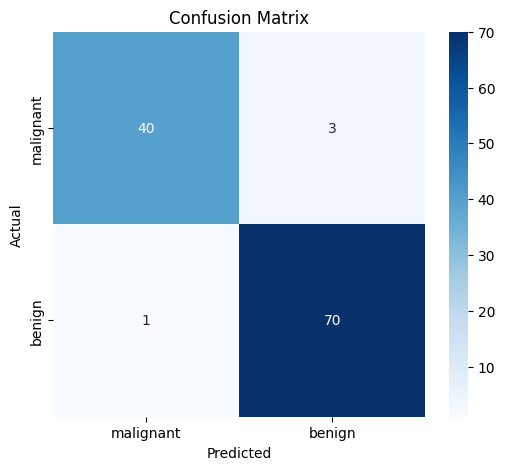

In [22]:
#35. Train a Random Forest Classifier and visualize the confusion matrix.

import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [23]:
#36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
]

# Define Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)

# Evaluate performance
accuracy = stacking_clf.score(X_test, y_test)
print("Stacking Classifier Accuracy:", accuracy)


Stacking Classifier Accuracy: 0.9649122807017544


In [24]:
#37. Train a Random Forest Classifier and print the top 5 most important features.

# Get feature importances
import numpy as np

feature_importances = rf_clf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Print top 5 features
print("Top 5 Important Features:")
for i in range(5):
    print(f"{data.feature_names[sorted_indices[i]]}: {feature_importances[sorted_indices[i]]:.4f}")


Top 5 Important Features:
worst area: 0.1539
worst concave points: 0.1447
mean concave points: 0.1062
worst radius: 0.0780
mean concavity: 0.0680


In [25]:
#38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_bagging)
recall = recall_score(y_test, y_pred_bagging)
f1 = f1_score(y_test, y_pred_bagging)

print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")


Precision: 0.9583, Recall: 0.9718, F1-score: 0.9650


In [26]:
#39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

max_depth_values = [5, 10, 20, None]

for depth in max_depth_values:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    accuracy = rf.score(X_test, y_test)
    print(f"Random Forest with max_depth={depth} - Accuracy: {accuracy}")


Random Forest with max_depth=5 - Accuracy: 0.9649122807017544
Random Forest with max_depth=10 - Accuracy: 0.9649122807017544
Random Forest with max_depth=20 - Accuracy: 0.9649122807017544
Random Forest with max_depth=None - Accuracy: 0.9649122807017544


In [27]:
#40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.

from sklearn.neighbors import KNeighborsRegressor

# Using Decision Tree
bagging_dt = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bagging_dt.fit(X_train, y_train)
mse_dt = mean_squared_error(y_test, bagging_dt.predict(X_test))

# Using KNN
bagging_knn = BaggingRegressor(estimator=KNeighborsRegressor(), n_estimators=50, random_state=42)
bagging_knn.fit(X_train, y_train)
mse_knn = mean_squared_error(y_test, bagging_knn.predict(X_test))

print("Bagging Regressor with Decision Tree - MSE:", mse_dt)
print("Bagging Regressor with KNeighbors - MSE:", mse_knn)


Bagging Regressor with Decision Tree - MSE: 0.03357543859649123
Bagging Regressor with KNeighbors - MSE: 0.02909782456140351


In [28]:
#41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

from sklearn.metrics import roc_auc_score

# Get predicted probabilities
y_probs = rf_clf.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print("Random Forest Classifier ROC-AUC Score:", roc_auc)


Random Forest Classifier ROC-AUC Score: 0.9952505732066819


In [29]:
#42. Train a Bagging Classifier and evaluate its performance using cross-validation.

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')
print("Bagging Classifier Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Bagging Classifier Cross-Validation Accuracy Scores: [0.9122807  0.92105263 0.98245614 0.95614035 1.        ]
Mean Accuracy: 0.9543859649122808


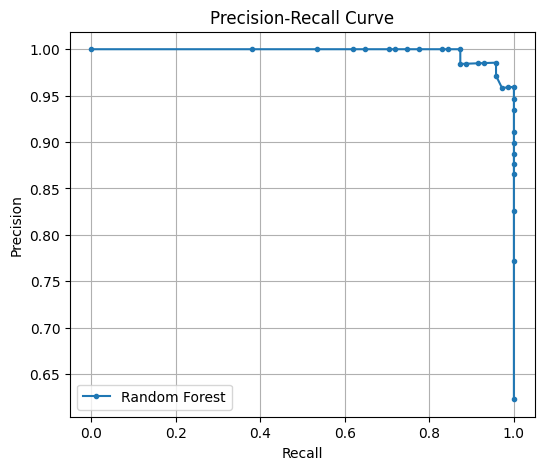

In [30]:
#43. Train a Random Forest Classifier and plot the Precision-Recall curve.

from sklearn.metrics import precision_recall_curve

# Compute precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


In [31]:
#44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
]

# Define Stacking Classifier
stacking_clf2 = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_clf2.fit(X_train, y_train)

# Evaluate performance
accuracy = stacking_clf2.score(X_test, y_test)
print("Stacking Classifier (RF + Logistic Regression) Accuracy:", accuracy)


Stacking Classifier (RF + Logistic Regression) Accuracy: 0.9649122807017544


In [32]:
#45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

# Test different bootstrap sample sizes
bootstrap_values = [True, False]

for bootstrap in bootstrap_values:
    bagging_reg = BaggingRegressor(n_estimators=50, bootstrap=bootstrap, random_state=42)
    bagging_reg.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bagging_reg.predict(X_test))
    print(f"Bagging Regressor with bootstrap={bootstrap} - MSE: {mse}")


Bagging Regressor with bootstrap=True - MSE: 0.03357543859649123
Bagging Regressor with bootstrap=False - MSE: 0.05620350877192982
